In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!pip install -Uqq fastbook
import fastbook

In [ ]:
from fastbook import *
from IPython.display import display,HTML

In [ ]:
from fastai.text.all import *
path = untar_data(URLs.AMAZON_REVIEWS, dest = "Data")

In [ ]:
train = pd.read_csv(path/'train.csv', header=None, nrows=500000)
train.head()

,0,1,2
0,3,more like funchuck,"Gave this to my dad for a gag gift after directing ""Nunsense,"" he got a reall kick out of it!"
1,5,Inspiring,"I hope a lot of people hear this cd. We need more strong and positive vibes like this. Great vocals, fresh tunes, cross-cultural happiness. Her blues is from the gut. The pop sounds are catchy and mature."
2,5,The best soundtrack ever to anything.,"I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny."
3,4,Chrono Cross OST,"The music of Yasunori Misuda is without question my close second below the great Nobuo Uematsu.Chrono Cross OST is a wonderful creation filled with rich orchestra and synthesized sounds. While ambiance is one of the music's major factors, yet at times it's very uplifting and vigorous. Some of my favourite tracks include; ""Scars Left by Time, The Girl who Stole the Stars, and Another World""."
4,5,Too good to be true,Probably the greatest soundtrack in history! Usually it's better to have played the game first but this is so enjoyable anyway! I worked so hard getting this soundtrack and after spending [money] to get it it was really worth every penny!! Get this OST! it's amazing! The first few tracks will have you dancing around with delight (especially Scars Left by Time)!! BUY IT NOW!!


In [ ]:
test = pd.read_csv(path/'test.csv', header=None, nrows=110000)
test.head()

,0,1,2
0,1,mens ultrasheer,"This model may be ok for sedentary types, but I'm active and get around alot in my job - consistently found these stockings rolled up down by my ankles! Not Good!! Solution: go with the standard compression stocking, 20-30, stock #114622. Excellent support, stays up and gives me what I need. Both pair of these also tore as I struggled to pull them up all the time. Good riddance/bad investment!"
1,4,Surprisingly delightful,"This is a fast read filled with unexpected humour and profound insights into the art of politics and policy. In brief, it is sly, wry, and wise."
2,2,"Works, but not as advertised","I bought one of these chargers..the instructions say the lights stay on while the battery charges...true. The instructions doNT say the lights turn off when its done. Which is also true. 24 hours of charging and the lights stay on. I returned it thinking I had a bad unit.The new one did the same thing. I just kept it since it does charge...but the lights are useless since they seem to always stay on. It's a ""backup"" charger for when I manage to drain all my AAs but I wouldn't want this as my only charger."
3,2,Oh dear,"I was excited to find a book ostensibly about Muslim feminism, but this volume did not live up to the expectations.One essay, among other things, describes the veil as potentially liberating. It doesn't begin to explain how or why.Another, on Muslim women in Cape Town, claims that Muslim women there are separate but ""more than equal."" Gee whiz, what a disappointment.I had expected and hoped for at least one Muslim feminist condemnation of gender apartheid. But there is not a single one in the book.I'm surprised it didn't have an essay extolling the virtues of female genital mutilation.--Al..."
4,2,Incorrect disc!,"I am a big JVC fan, but I do not like this model, I was suspiscious when I saw several units in the return section of the store. I bought one anyway (new) and must say I am not happy. The unit sends out clicks to the receiver once in a while, the transition between scenes is not always smooth,(like a little pause) and while it is still fairly new I can't get any DVD,CD or even a DVD headcleaner to work. All I get is a ""incorrect disc"" message."


In [ ]:
train.columns = ['ratings', 'title', 'review']
train.head()

,ratings,title,review
0,3,more like funchuck,"Gave this to my dad for a gag gift after directing ""Nunsense,"" he got a reall kick out of it!"
1,5,Inspiring,"I hope a lot of people hear this cd. We need more strong and positive vibes like this. Great vocals, fresh tunes, cross-cultural happiness. Her blues is from the gut. The pop sounds are catchy and mature."
2,5,The best soundtrack ever to anything.,"I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny."
3,4,Chrono Cross OST,"The music of Yasunori Misuda is without question my close second below the great Nobuo Uematsu.Chrono Cross OST is a wonderful creation filled with rich orchestra and synthesized sounds. While ambiance is one of the music's major factors, yet at times it's very uplifting and vigorous. Some of my favourite tracks include; ""Scars Left by Time, The Girl who Stole the Stars, and Another World""."
4,5,Too good to be true,Probably the greatest soundtrack in history! Usually it's better to have played the game first but this is so enjoyable anyway! I worked so hard getting this soundtrack and after spending [money] to get it it was really worth every penny!! Get this OST! it's amazing! The first few tracks will have you dancing around with delight (especially Scars Left by Time)!! BUY IT NOW!!


In [ ]:
train.describe()

,ratings
count,500000.000000
mean,3.016060
std,1.411655
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [ ]:
test.columns = ['ratings', 'title', 'review']
test.head()

,ratings,title,review
0,1,mens ultrasheer,"This model may be ok for sedentary types, but I'm active and get around alot in my job - consistently found these stockings rolled up down by my ankles! Not Good!! Solution: go with the standard compression stocking, 20-30, stock #114622. Excellent support, stays up and gives me what I need. Both pair of these also tore as I struggled to pull them up all the time. Good riddance/bad investment!"
1,4,Surprisingly delightful,"This is a fast read filled with unexpected humour and profound insights into the art of politics and policy. In brief, it is sly, wry, and wise."
2,2,"Works, but not as advertised","I bought one of these chargers..the instructions say the lights stay on while the battery charges...true. The instructions doNT say the lights turn off when its done. Which is also true. 24 hours of charging and the lights stay on. I returned it thinking I had a bad unit.The new one did the same thing. I just kept it since it does charge...but the lights are useless since they seem to always stay on. It's a ""backup"" charger for when I manage to drain all my AAs but I wouldn't want this as my only charger."
3,2,Oh dear,"I was excited to find a book ostensibly about Muslim feminism, but this volume did not live up to the expectations.One essay, among other things, describes the veil as potentially liberating. It doesn't begin to explain how or why.Another, on Muslim women in Cape Town, claims that Muslim women there are separate but ""more than equal."" Gee whiz, what a disappointment.I had expected and hoped for at least one Muslim feminist condemnation of gender apartheid. But there is not a single one in the book.I'm surprised it didn't have an essay extolling the virtues of female genital mutilation.--Al..."
4,2,Incorrect disc!,"I am a big JVC fan, but I do not like this model, I was suspiscious when I saw several units in the return section of the store. I bought one anyway (new) and must say I am not happy. The unit sends out clicks to the receiver once in a while, the transition between scenes is not always smooth,(like a little pause) and while it is still fairly new I can't get any DVD,CD or even a DVD headcleaner to work. All I get is a ""incorrect disc"" message."


In [ ]:
test.describe()

,ratings
count,110000.000000
mean,3.022209
std,1.413290
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


<AxesSubplot:>

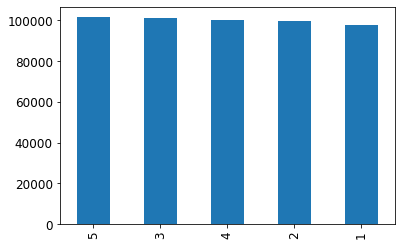

In [ ]:
train['ratings'].value_counts().plot(kind='bar')

In [ ]:
train['ratings'].value_counts()

5    101573
3    100983
4     99960
2     99892
1     97592
Name: ratings, dtype: int64

In [ ]:
txts = L([i for i in train['review']])

In [ ]:
tok = Tokenizer.from_df(train)
tok.setup(train)

toks = txts.map(tok)
toks[0]

(#26) ['xxbos','xxmaj','gave','this','to','my','dad','for','a','gag'...]

In [ ]:
num = Numericalize()
num.setup(toks)
nums = toks.map(num)
nums[0][:10]

TensorText([   2,    8,  378,   19,   15,   37, 1748,   22,   14, 6655])

In [ ]:
num.encodes(toks[0])

TensorText([    2,     8,   378,    19,    15,    37,  1748,    22,    14,  6655,   550,   105,  3581,    24,     0,    11,    24,    67,   148,    14, 21449,  2221,    59,    17,    16,    40])

In [ ]:
num.decode(nums[0])

(#26) ['xxbos','xxmaj','gave','this','to','my','dad','for','a','gag'...]

In [ ]:
language_model = pd.concat([train, test], axis=0)[['review']]
language_model.head()

,review
0,"Gave this to my dad for a gag gift after directing ""Nunsense,"" he got a reall kick out of it!"
1,"I hope a lot of people hear this cd. We need more strong and positive vibes like this. Great vocals, fresh tunes, cross-cultural happiness. Her blues is from the gut. The pop sounds are catchy and mature."
2,"I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny."
3,"The music of Yasunori Misuda is without question my close second below the great Nobuo Uematsu.Chrono Cross OST is a wonderful creation filled with rich orchestra and synthesized sounds. While ambiance is one of the music's major factors, yet at times it's very uplifting and vigorous. Some of my favourite tracks include; ""Scars Left by Time, The Girl who Stole the Stars, and Another World""."
4,Probably the greatest soundtrack in history! Usually it's better to have played the game first but this is so enjoyable anyway! I worked so hard getting this soundtrack and after spending [money] to get it it was really worth every penny!! Get this OST! it's amazing! The first few tracks will have you dancing around with delight (especially Scars Left by Time)!! BUY IT NOW!!


In [ ]:
language_model.describe()

,review
count,610000
unique,609640
top,.it was a freebie. it was a paperless book. why not take advantage of it right? not like WHOA! book!
freq,7


In [ ]:
data_lm = DataBlock(
    blocks=TextBlock.from_df('review', is_lm=True),
    get_x=ColReader('text'), 
    splitter=RandomSplitter(0.1) 
)

In [ ]:
data_lm = data_lm.dataloaders(language_model, bs=64, seq_len=72)

In [ ]:
data_lm.show_batch(max_n=5)

,text,text_
0,"xxbos xxmaj all the reviews aside , this a good movie , and i enjoy it every time i watch it . xxmaj i 'd call it a sleeper . xxmaj walter xxmaj xxunk is great as always . xxbos i like xxmaj sapphire even better than her newest book xxup diamond . xxmaj the characters are rich and memorable . xxmaj the female character is strong of will and the male","xxmaj all the reviews aside , this a good movie , and i enjoy it every time i watch it . xxmaj i 'd call it a sleeper . xxmaj walter xxmaj xxunk is great as always . xxbos i like xxmaj sapphire even better than her newest book xxup diamond . xxmaj the characters are rich and memorable . xxmaj the female character is strong of will and the male is"
1,"under the skin , but the needle tips end up snapping the hair when you try to tweeze it xxunk i use a combination , this to xxunk the hair , and another product to actually pull the hair out . xxbos a xxmaj world xxmaj lit xxmaj only by xxmaj fire , is a succinct , fast paced history of xxmaj europe from the fall of the xxmaj roman xxmaj empire","the skin , but the needle tips end up snapping the hair when you try to tweeze it xxunk i use a combination , this to xxunk the hair , and another product to actually pull the hair out . xxbos a xxmaj world xxmaj lit xxmaj only by xxmaj fire , is a succinct , fast paced history of xxmaj europe from the fall of the xxmaj roman xxmaj empire and"
2,"and the heroine is not very likeable . xxmaj keeping the reader in the dark about what 's going on made it hard to read , i almost gave up on it . i certainly did nt hurry to finish the book . xxmaj at least i got more done around the house because it was n't hard to put down . xxbos xxmaj xxunk is not your conventional "" club ""","the heroine is not very likeable . xxmaj keeping the reader in the dark about what 's going on made it hard to read , i almost gave up on it . i certainly did nt hurry to finish the book . xxmaj at least i got more done around the house because it was n't hard to put down . xxbos xxmaj xxunk is not your conventional "" club "" album"
3,"the most xxunk decline in any rock band since … well , since forever , as far as i can tell . xxmaj please , please , bring back the brilliant musicians who wrote xxmaj ride the xxmaj tiger , xxmaj painful , xxmaj may i xxmaj sing xxmaj with xxmaj me , and other stand - outs of intelligent rock music . xxbos xxmaj tough … xxup m&d is not an","most xxunk decline in any rock band since … well , since forever , as far as i can tell . xxmaj please , please , bring back the brilliant musicians who wrote xxmaj ride the xxmaj tiger , xxmaj painful , xxmaj may i xxmaj sing xxmaj with xxmaj me , and other stand - outs of intelligent rock music . xxbos xxmaj tough … xxup m&d is not an easy"
4,"concern was under the xxunk i would have to sign for my purchase when it arived as i found it in my mail box . xxbos i liked xxmaj robert xxmaj harris ' xxmaj pompeii . i read it in a few days , enjoyed it , and found the story to be well written . xxmaj but - there is a but - it could be boring at times . xxmaj","was under the xxunk i would have to sign for my purchase when it arived as i found it in my mail box . xxbos i liked xxmaj robert xxmaj harris ' xxmaj pompeii . i read it in a few days , enjoyed it , and found the story to be well written . xxmaj but - there is a but - it could be boring at times . xxmaj it"


In [ ]:
torch.save(data_lm, path/'amazon_sentiments_data_lm.pkl')

In [ ]:
data_lm = torch.load(path/'amazon_sentiments_data_lm.pkl')

In [ ]:
learn_model = language_model_learner(
    data_lm, AWD_LSTM,
    metrics=[accuracy, Perplexity()]).to_fp16()

In [ ]:
learn_model.model

SequentialRNN(
  (0): AWD_LSTM(
    (encoder): Embedding(60008, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(60008, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1152, batch_first=True)
      )
      (1): WeightDropout(
        (module): LSTM(1152, 1152, batch_first=True)
      )
      (2): WeightDropout(
        (module): LSTM(1152, 400, batch_first=True)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
      (1): RNNDropout()
      (2): RNNDropout()
    )
  )
  (1): LinearDecoder(
    (decoder): Linear(in_features=400, out_features=60008, bias=True)
    (output_dp): RNNDropout()
  )
)

SuggestedLRs(lr_min=0.014454397559165954, lr_steep=7.585775847473997e-07)

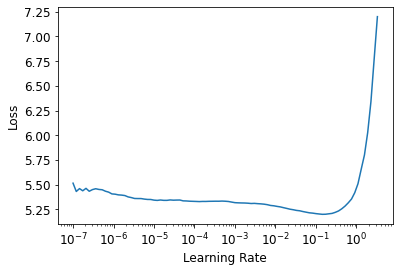

In [ ]:
learn_model.lr_find()

In [ ]:
learn_model.fine_tune(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.464083,4.020653,0.278305,55.737476,1:43:27


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.020104,3.741584,0.309275,42.164738,1:55:21
1,3.907612,3.660431,0.318986,38.878109,1:55:08
2,3.847359,3.599310,0.325338,36.572998,1:55:10
3,3.794616,3.555801,0.329626,35.015869,1:58:58
4,3.762177,3.542487,0.331098,34.552742,1:59:09


In [ ]:
learn_model.save_encoder('finetuned_encoder2')

In [ ]:
learn_model.load('finetuned_encoder2')

RuntimeError: Error(s) in loading state_dict for SequentialRNN:
	Missing key(s) in state_dict: "0.encoder.weight", "0.encoder_dp.emb.weight", "0.rnns.0.weight_hh_l0_raw", "0.rnns.0.module.weight_ih_l0", "0.rnns.0.module.bias_ih_l0", "0.rnns.0.module.bias_hh_l0", "0.rnns.1.weight_hh_l0_raw", "0.rnns.1.module.weight_ih_l0", "0.rnns.1.module.bias_ih_l0", "0.rnns.1.module.bias_hh_l0", "0.rnns.2.weight_hh_l0_raw", "0.rnns.2.module.weight_ih_l0", "0.rnns.2.module.bias_ih_l0", "0.rnns.2.module.bias_hh_l0", "1.decoder.weight", "1.decoder.bias". 
	Unexpected key(s) in state_dict: "encoder.weight", "encoder_dp.emb.weight", "rnns.0.weight_hh_l0_raw", "rnns.0.module.weight_ih_l0", "rnns.0.module.bias_ih_l0", "rnns.0.module.bias_hh_l0", "rnns.1.weight_hh_l0_raw", "rnns.1.module.weight_ih_l0", "rnns.1.module.bias_ih_l0", "rnns.1.module.bias_hh_l0", "rnns.2.weight_hh_l0_raw", "rnns.2.module.weight_ih_l0", "rnns.2.module.bias_ih_l0", "rnns.2.module.bias_hh_l0". 

In [ ]:
learn_model.predict("This laptop was horrible because", 30, temperature=0.80)

In [ ]:
learn_model.predict("I absolutely loved this dress because", 20, temperature=0.80)

In [ ]:
blocks = (TextBlock.from_df('text', seq_len=data_lm.seq_len, vocab=data_lm.vocab), CategoryBlock())
data_classifier = DataBlock(blocks=blocks,
                get_x=ColReader('text'),
                get_y=ColReader('target'),
                splitter=RandomSplitter(0.2))

In [ ]:
data_classifier = data_classifier.dataloaders(train, bs=64)

In [ ]:
data_classifier.show_batch(max_n=5)

In [ ]:
learn_model = text_classifier_learner(data_classifier, AWD_LSTM, metrics=[accuracy], drop_mult=0.5)

In [ ]:
learn_model.load_encoder('finetuned_encoder')

In [ ]:
learn_model.lr_find()

In [ ]:
learn_model.fit_one_cycle(1, 1e-2)

In [ ]:
learn_model.freeze_to(-2)
learn_model.fit_one_cycle(1, slice(1e-3/(2.6**4),1e-2))

In [ ]:
learn_model.freeze_to(-3)
learn_model.fit_one_cycle(1, slice(5e-3/(2.6**4),1e-2))

In [ ]:
learn_model.unfreeze()
learn_model.fit_one_cycle(2, slice(1e-3/(2.6**4),3e-3))

In [ ]:
learn_model.save('trained_model')

In [ ]:
learn_model.export()